## Import Necessary Libaries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv, pd.read_excel, pd.read_txt etc)
import matplotlib.pyplot as plt #For data visualization
import scipy #For Scientific Computing
import seaborn as sns #For data visualization

## READING THE FUEL UTILITY DATASET

In [2]:
url= 'https://github.com/WalePhenomenon/climate_change/blob/master/fuel_ferc1.csv?raw=true'
fuel_data = pd.read_csv(url, error_bad_lines= False)
print('The rows and columns of our fuel dataset is:',fuel_data.shape)

The rows and columns of our fuel dataset is: (29523, 11)


In [3]:
fuel_data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [4]:
fuel_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
record_id,29523,29523,f1_fuel_2001_12_17_0_2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
utility_id_ferc1,29523,NaN,NaN,NaN,118.602,74.1784,1,55,122,176,514
report_year,29523,NaN,NaN,NaN,2005.81,7.02548,1994,2000,2006,2012,2018
plant_name_ferc1,29523,2315,big stone,156,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fuel_type_code_pudl,29523,6,gas,11486,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fuel_unit,29343,9,mcf,11354,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fuel_qty_burned,29523,NaN,NaN,NaN,2.62212e+06,9.118e+06,1,13817,253322,1.42403e+06,5.55894e+08
fuel_mmbtu_per_unit,29523,NaN,NaN,NaN,8.49211,10.6002,1e-06,1.024,5.76269,17.006,341.26
fuel_cost_per_unit_burned,29523,NaN,NaN,NaN,208.649,2854.49,-276.08,5.207,26,47.113,139358
fuel_cost_per_unit_delivered,29523,NaN,NaN,NaN,917.57,68775.9,-874.937,3.7785,17.371,42.137,7.96452e+06


In [5]:
num_data = ['fuel_qty_burned','fuel_mmbtu_per_unit','fuel_cost_per_unit_burned',
            'fuel_cost_per_unit_delivered','fuel_cost_per_mmbtu']
fuel_data[num_data].describe(include='all')

,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [6]:
#List of all categorical features
cate_data = ['plant_name_ferc1','fuel_type_code_pudl','fuel_unit']
fuel_data[cate_data].describe(include='all')

,plant_name_ferc1,fuel_type_code_pudl,fuel_unit
count,29523,29523,29343
unique,2315,6,9
top,big stone,gas,mcf
freq,156,11486,11354


In [7]:
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)
cate_data = ['plant_name_ferc1','fuel_type_code_pudl','fuel_unit']
def cate_value_count(categorical_data):
    for data in categorical_data:
        print('======='+'value_count for'+' '+ str(data) + '======' )
        print (str(fuel_data[data].value_counts()),'\n')

cate_value_count(cate_data)

=======value_count for plant_name_ferc1======
big stone               156
four corners            151
riverside               133
coyote                  121
louisa                  119
hayden                   99
ben french station       93
lake road                93
independence             91
oklaunion                90
boardman                 89
mcintosh                 88
asheville                87
lee                      87
ottumwa                  86
clover                   84
rockport total plant     83
colstrip                 83
craig                    82
jim bridger              81
lauderdale               78
port everglades          75
bay front                75
comanche                 75
schiller                 75
mitchell                 73
r.m. heskett             67
mill creek               66
tecumseh                 66
navajo                   64
amos-total               64
buck                     64
conemaugh                63
a s king                 63
bu

In [8]:
fuel_data[num_data].skew()

mcf       11354
ton        8958
bbl        7998
gramsU      464
mmbtu       180
kgU         110
mwhth       100
mwdth        95
gal          84
Name: fuel_unit, dtype: int64 



fuel_qty_burned                  15.851495
fuel_mmbtu_per_unit               4.135217
fuel_cost_per_unit_burned        19.787440
fuel_cost_per_unit_delivered    105.014227
fuel_cost_per_mmbtu             171.675535
dtype: float64

In [9]:
fuel_data[num_data].kurt()

fuel_qty_burned                   651.369450
fuel_mmbtu_per_unit                55.595695
fuel_cost_per_unit_burned         485.255851
fuel_cost_per_unit_delivered    11765.054226
fuel_cost_per_mmbtu             29489.132594
dtype: float64

In [10]:
fuel_data[num_data].median()

fuel_qty_burned                 253322.000000
fuel_mmbtu_per_unit                  5.762694
fuel_cost_per_unit_burned           26.000000
fuel_cost_per_unit_delivered        17.371000
fuel_cost_per_mmbtu                  4.127000
dtype: float64

In [11]:
fuel_data[num_data].mode()

,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,1.0,1.0,0.0,0.0,0.0


## Question 1
If you’re given two lists:

A = [1,2,3,4,5,6], B = [13, 21, 34]

The task is to create a list with the elements of A and B in a single dimension with output:

A_B =  [1,2,3,4,5,6,13, 21, 34]

Which of the following option is the best way to create this list?

In [12]:
#ANSWER

#Code to question 1
#Using extend function to extend items of a list
A = [1,2,3,4,5,6]
B = [13,21,34]
A.extend(B)
print(A)
#B.extend(A)
#print(B)

[1, 2, 3, 4, 5, 6, 13, 21, 34]


## Question 2
How do you create an identity matrix in python?

In [13]:
#ANSWER
#Code to Question 2
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [14]:
np.eye(3,3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## Question 3
Which of the following fuel type code has the lowest average fuel cost per unit burned?

In [15]:
#Code to question 3

f = ['fuel_type_code_pudl', 'fuel_cost_per_unit_burned']
fuel_data.groupby('fuel_type_code_pudl')['fuel_cost_per_unit_burned'].min()

#for i in dataset[f].columns:
 # if dataset['fuel_cost_per_unit_burned']:
  #  print(i)
#fuel_data.groupby('fuel_type_code_pudl')['fuel_cost_per_unit_burned'].max()

fuel_type_code_pudl
coal         0.00
gas          0.00
nuclear      0.00
oil          0.00
other     -119.04
waste     -276.08
Name: fuel_cost_per_unit_burned, dtype: float64

## Question 4
What is the standard deviation and 75th percentile of the measure of energy per unit (Fuel_mmbtu_per_unit) in two decimal places?

In [16]:
#Code to question 4
fuel_data['fuel_mmbtu_per_unit'].describe()

count    29523.000000
mean         8.492111
std         10.600220
min          0.000001
25%          1.024000
50%          5.762694
75%         17.006000
max        341.260000
Name: fuel_mmbtu_per_unit, dtype: float64

## Question 5
What is the skewness and kurtosis for the fuel quantity burned in two decimal places?

In [17]:
#Code to question 5
print(fuel_data['fuel_qty_burned'].skew().round(2))
print(fuel_data['fuel_qty_burned'].kurt().round(2))

15.85
651.37


## Question 6
Which feature has missing values and what is the total number of missing value and percentage of the missing rows as a factor of the total number of rows in three decimal places? 

(Enter answer in the format: Feature: xxx, Total: xxx, Percent: xxx)

In [18]:
fuel_data['fuel_unit'].isnull().sum()

180

In [19]:
#Code to question 6
#The percentage of null values is
((fuel_data['fuel_unit'].isnull().sum()/fuel_data['fuel_unit'].count())*100).round(3)
#The null values occured in fuel_unit colum

0.613

In [20]:
fuel_data['fuel_unit'].count()

29343

## Question 7
The feature with missing values falls under what category? What missing value imputation technique would you use?

In [21]:
#Code to question 7
#fuel_data[[ 'fuel_unit' ]] = fuel_data[[ 'fuel_unit' ]].fillna(value= 'mcf')


## Question 8
Which of the features has the second and third lowest correlation with the Fuel Cost Per Unit Burned?

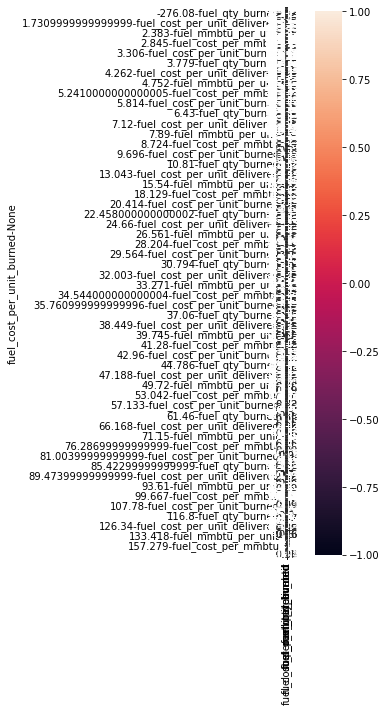

In [22]:
#Code to question 8
heat_map = ["fuel_qty_burned","fuel_mmbtu_per_unit","fuel_cost_per_unit_burned",
        "fuel_cost_per_unit_delivered","fuel_cost_per_mmbtu"]
corrmat= fuel_data.groupby('fuel_cost_per_unit_burned')[heat_map].corr()
f, ax =plt.subplots(figsize=(10,10))
sns.heatmap(corrmat, annot= True,square=True)

## Question 9
For the fuel type coal, what is the percentage change in the fuel cost per unit burned in 1998 compared to 1994?

In [23]:
#Code to question 9
fuel_data.groupby('report_year')['fuel_cost_per_unit_burned'].sum()

report_year
1994    263292.115
1995    425661.488
1996     86425.275
1997    163533.452
1998    140238.656
1999    126056.285
2000    326495.434
2001    180365.641
2002    121921.135
2003    149175.726
2004    184637.699
2005    135924.139
2006    188142.032
2007    256114.312
2008    314312.022
2009    263584.566
2010    331581.467
2011    374175.603
2012    321693.544
2013    306933.236
2014    518002.469
2015    260060.984
2016    255484.814
2017    244557.823
2018    221575.426
Name: fuel_cost_per_unit_burned, dtype: float64

In [24]:
fuel_data.groupby('report_year')['fuel_cost_per_unit_burned'].min()

report_year
1994    -57.490
1995    -85.760
1996    -45.130
1997    -38.966
1998    -43.712
1999    -33.014
2000   -276.080
2001    -37.809
2002    -59.680
2003   -119.040
2004    -30.032
2005    -31.501
2006    -24.295
2007     -3.810
2008     -3.330
2009      0.000
2010      0.000
2011    -70.884
2012      0.000
2013      0.000
2014      0.000
2015      0.000
2016     -3.946
2017      0.000
2018      0.000
Name: fuel_cost_per_unit_burned, dtype: float64

In [25]:
fuel_data.groupby('report_year')['fuel_cost_per_unit_burned'].max()

report_year
1994     44009.190
1995     62609.000
1996     33150.000
1997     48164.000
1998     54376.000
1999     31640.600
2000     51698.000
2001     34652.000
2002     35486.000
2003     34518.000
2004     31825.840
2005     35948.000
2006     43851.000
2007     45486.000
2008     45578.820
2009     49650.832
2010     64313.100
2011     83538.000
2012     65137.588
2013     61717.765
2014    139358.000
2015     53889.540
2016     55098.539
2017     51417.892
2018     44738.780
Name: fuel_cost_per_unit_burned, dtype: float64

In [26]:
print(((54376- (-43.712))/(44009.190-(-57.490)))*100)


123.4940140714027


## Question 10
Which year has the highest average fuel cost per unit delivered?

In [27]:
#Code to question 10
#Getting average of Fuel cost per unit delivered with regards to 1997,2018,1996,2004,2009
fuel_data.groupby('report_year')['fuel_cost_per_unit_delivered'].sum()//len(fuel_data)

report_year
1994      2.0
1995      1.0
1996    338.0
1997    412.0
1998     10.0
1999      0.0
2000     45.0
2001      2.0
2002      1.0
2003      2.0
2004      5.0
2005      1.0
2006      1.0
2007      1.0
2008      2.0
2009     27.0
2010      3.0
2011      2.0
2012      2.0
2013      6.0
2014      7.0
2015     12.0
2016      3.0
2017      1.0
2018     16.0
Name: fuel_cost_per_unit_delivered, dtype: float64

In [28]:
fuel_data.skew().T

utility_id_ferc1                  0.605070
report_year                       0.006953
fuel_qty_burned                  15.851495
fuel_mmbtu_per_unit               4.135217
fuel_cost_per_unit_burned        19.787440
fuel_cost_per_unit_delivered    105.014227
fuel_cost_per_mmbtu             171.675535
dtype: float64

In [29]:
fuel_data.kurt().T

utility_id_ferc1                    1.088432
report_year                        -1.145656
fuel_qty_burned                   651.369450
fuel_mmbtu_per_unit                55.595695
fuel_cost_per_unit_burned         485.255851
fuel_cost_per_unit_delivered    11765.054226
fuel_cost_per_mmbtu             29489.132594
dtype: float64

In [30]:
fuel_data.groupby( 'fuel_type_code_pudl' ).first()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
fuel_type_code_pudl,,,,,,,,,,
coal,f1_fuel_1994_12_1_0_7,1,1994,rockport,ton,5377489.0,16.590000,18.590,18.530,1.121
gas,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,mcf,40533.0,1.000000,2.770,2.770,2.570
nuclear,f1_fuel_1994_12_2_1_1,2,1994,joseph m. farley,kgU,2260.0,0.064094,28.770,0.000,0.450
oil,f1_fuel_1994_12_6_0_2,6,1994,clinch river,bbl,6510.0,5.875338,32.130,23.444,5.469
other,f1_fuel_1994_12_11_0_6,11,1994,w.f. wyman,bbl,55652.0,0.149719,14.685,15.090,2.335
waste,f1_fuel_1994_12_9_0_3,9,1994,b.l. england,ton,2438.0,0.015939,34.180,34.180,1.072


In [31]:
fuel_data[[ 'fuel_unit' ]] = fuel_data[[ 'fuel_unit' ]].fillna(value= 'mcf')

In [32]:
fuel_data.duplicated().all()

False

In [33]:
#correlation among the  numeric dataset
fuel_data.corr()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
utility_id_ferc1,1.000000,0.093323,-0.057447,-0.066946,-0.037863,-0.016414,0.006122
report_year,0.093323,1.000000,0.012952,-0.110853,0.013599,-0.014043,0.010261
fuel_qty_burned,-0.057447,0.012952,1.000000,-0.080946,-0.018535,-0.003551,-0.001896
fuel_mmbtu_per_unit,-0.066946,-0.110853,-0.080946,1.000000,-0.010034,-0.009039,-0.005884
fuel_cost_per_unit_burned,-0.037863,0.013599,-0.018535,-0.010034,1.000000,0.011007,-0.000437
fuel_cost_per_unit_delivered,-0.016414,-0.014043,-0.003551,-0.009039,0.011007,1.000000,-0.000109
fuel_cost_per_mmbtu,0.006122,0.010261,-0.001896,-0.005884,-0.000437,-0.000109,1.000000


In [34]:
fuel_data.groupby('report_year')['fuel_cost_per_unit_delivered'].sum()//len(fuel_data)

report_year
1994      2.0
1995      1.0
1996    338.0
1997    412.0
1998     10.0
1999      0.0
2000     45.0
2001      2.0
2002      1.0
2003      2.0
2004      5.0
2005      1.0
2006      1.0
2007      1.0
2008      2.0
2009     27.0
2010      3.0
2011      2.0
2012      2.0
2013      6.0
2014      7.0
2015     12.0
2016      3.0
2017      1.0
2018     16.0
Name: fuel_cost_per_unit_delivered, dtype: float64

In [35]:
#checking for missing values
fuel_data['fuel_unit'].isnull().sum()

0

In [36]:

f = ['fuel_type_code_pudl', 'fuel_cost_per_unit_burned']
fuel_data.groupby('fuel_type_code_pudl')['fuel_cost_per_unit_burned'].min()

#for i in dataset[f].columns:
 # if dataset['fuel_cost_per_unit_burned']:
  #  print(i)

fuel_type_code_pudl
coal         0.00
gas          0.00
nuclear      0.00
oil          0.00
other     -119.04
waste     -276.08
Name: fuel_cost_per_unit_burned, dtype: float64

In [37]:
fuel_data.groupby('fuel_type_code_pudl')['fuel_cost_per_unit_burned'].max()

fuel_type_code_pudl
coal        44033.320
gas         10490.000
nuclear     69785.215
oil        139358.000
other         134.547
waste         132.291
Name: fuel_cost_per_unit_burned, dtype: float64

In [38]:
fuel_data['fuel_cost_per_unit_burned'].quantile(0.75)

47.113

In [39]:
fuel_data[num_data].var().round()

fuel_qty_burned                 8.313799e+13
fuel_mmbtu_per_unit             1.120000e+02
fuel_cost_per_unit_burned       8.148114e+06
fuel_cost_per_unit_delivered    4.730128e+09
fuel_cost_per_mmbtu             4.374544e+06
dtype: float64

In [40]:
fuel_data[num_data].std()

fuel_qty_burned                 9.118004e+06
fuel_mmbtu_per_unit             1.060022e+01
fuel_cost_per_unit_burned       2.854490e+03
fuel_cost_per_unit_delivered    6.877593e+04
fuel_cost_per_mmbtu             2.091541e+03
dtype: float64

In [41]:
#INTERQUANTILE RANGE
fuel_data[num_data].quantile(0.75) - fuel_data[num_data].quantile(0.25)

fuel_qty_burned                 1.410217e+06
fuel_mmbtu_per_unit             1.598200e+01
fuel_cost_per_unit_burned       4.190600e+01
fuel_cost_per_unit_delivered    3.835850e+01
fuel_cost_per_mmbtu             5.805000e+00
dtype: float64

In [42]:
#SEMI INTERQUANTILE RANGE
(fuel_data[num_data].quantile(0.75) - fuel_data[num_data].quantile(0.25))/2

fuel_qty_burned                 705108.50000
fuel_mmbtu_per_unit                  7.99100
fuel_cost_per_unit_burned           20.95300
fuel_cost_per_unit_delivered        19.17925
fuel_cost_per_mmbtu                  2.90250
dtype: float64

In [43]:
#fuel_data.groupby('fuel_unit').agg({'fuel_cost_per_unit_burned':fuel_data['fuel_cost_per_unit_burned'].quantile(0.75)})

In [44]:
#The percentage of null values is
(fuel_data['fuel_unit'].isnull().sum()/fuel_data.size)*100
#The null values occured in fuel_unit colum

0.0

In [45]:
fuel_data.size

324753